# Model Evaluation and Performance Analysis

This notebook loads the best-performing model saved by the `03_train_model.py` script and evaluates its performance on the test set.

### Objectives:
1.  Load the test data and the trained classifier.
2.  Generate a **Classification Report** to see precision, recall (per-class accuracy), and F1-score for each class.
3.  Create a **Confusion Matrix** to visualize the model's predictions and identify where it gets confused.

In [2]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported Successfully")
# Set plotting style
sns.set_style('whitegrid')

Libraries Imported Successfully


## 2. Configuration

The paths here must match the paths used in your training script (`03_train_model.py`) to ensure we load the correct data and model.

In [3]:
# Path to the feature file created by the feature extraction script
FEATURES_PATH = os.path.join('features', 'resnet50_features.csv') 

# Path to the saved model
MODELS_PATH = 'models'
MODEL_FILENAME = 'best_oct_resnet_classifier.pkl'
MODEL_PATH = os.path.join(MODELS_PATH, MODEL_FILENAME)

## 3. Load Data

We load the extracted features and perform the **exact same train-test split** as in the training script. This is critical for ensuring we evaluate the model on the correct, unseen test data.

In [4]:
print("Loading features...")
df = pd.read_csv(FEATURES_PATH)

X = df.drop('label', axis=1)
y = df['label']

# Use the same random_state and stratify options to get the identical split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data loaded. Test set contains {len(X_test)} samples.")

Loading features...
Data loaded. Test set contains 2400 samples.


## 4. Load Trained Model

Now we load the pipeline (scaler + classifier) that was saved during training.

In [10]:
try:
    model = joblib.load(MODEL_PATH)
    print(f"Model '{MODEL_FILENAME}' loaded successfully.")
    print("\nModel Details:")
    print(model)
except FileNotFoundError:
    print(f"ERROR: Model file not found at {MODEL_PATH}. Please run the training script first.")

Model 'best_oct_resnet_classifier.pkl' loaded successfully.

Model Details:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1, probability=True))])


## 5. Performance Evaluation

With the model and test data loaded, we can now generate predictions and evaluate performance.

In [11]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Get the class labels from the model
class_labels = model.classes_

print("Predictions generated for the test set.")

Predictions generated for the test set.


### 5.1. Classification Report

The classification report provides the key metrics for each class.
- **Precision:** Ability of the classifier not to label a negative sample as positive.
- **Recall (Per-Class Accuracy):** Ability of the classifier to find all the positive samples. This is what you asked for as "data accuracy for each class".
- **F1-Score:** The weighted average of Precision and Recall.

In [13]:
print(f"Classification Report for {MODEL_FILENAME}:\n")
report = classification_report(y_test, y_pred, labels=class_labels)
print(report)

Classification Report for best_oct_resnet_classifier.pkl:

              precision    recall  f1-score   support

         CNV       0.88      0.84      0.86       600
         DME       0.88      0.88      0.88       600
      DRUSEN       0.83      0.80      0.81       600
      NORMAL       0.84      0.91      0.87       600

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



### 5.2. Confusion Matrix

The confusion matrix is the best way to visualize model performance.
- The **diagonal** (top-left to bottom-right) shows the number of **correct** predictions for each class.
- Off-diagonal values show where the model is making **incorrect** predictions (i.e., which classes it's confusing with each other).

We will show two matrices: one with raw counts and another normalized to show percentages (recall).

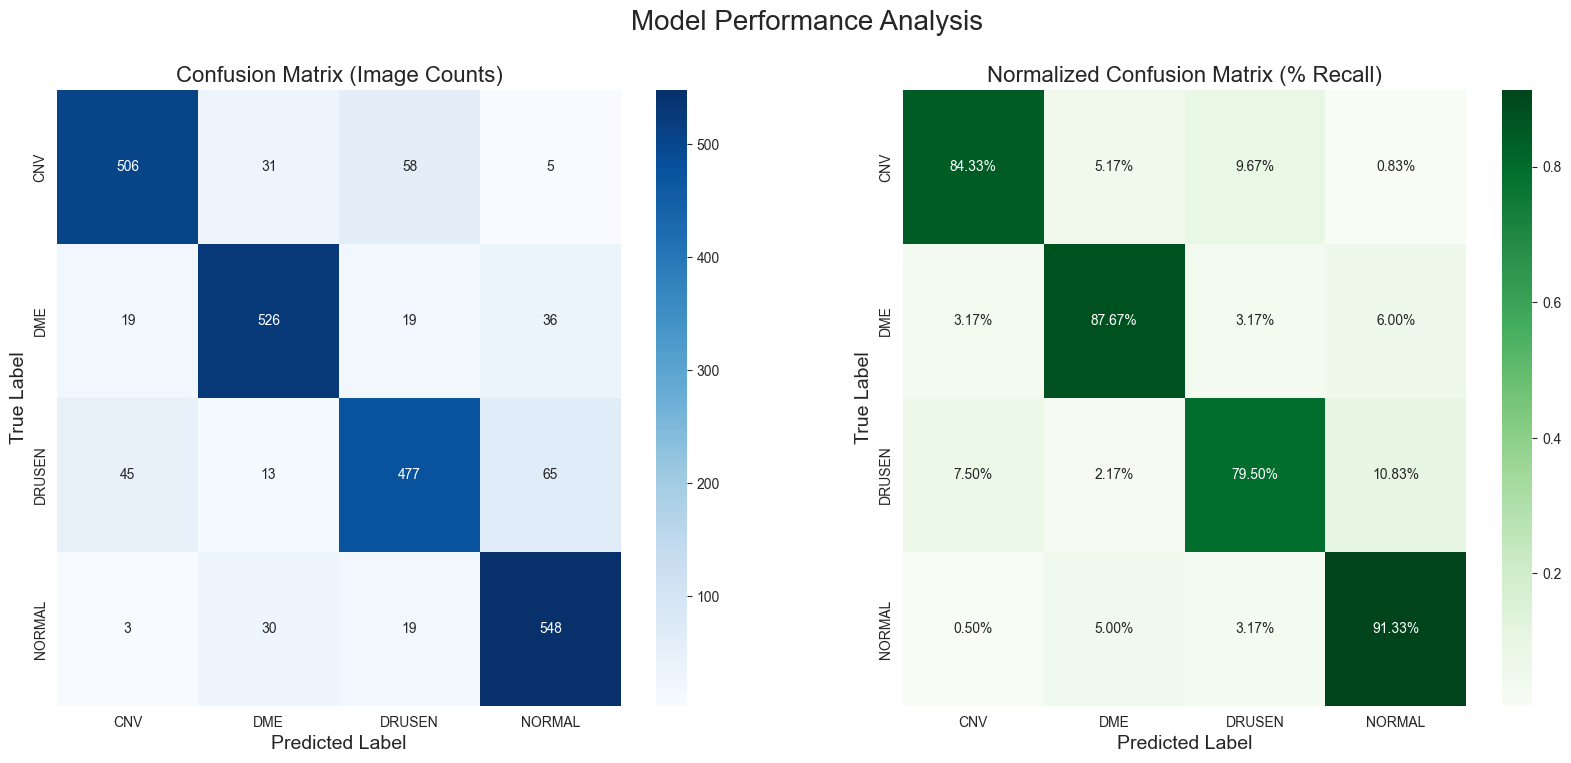

In [19]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plot the confusion matrix with raw counts
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Model Performance Analysis', fontsize=20)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=class_labels, yticklabels=class_labels)
ax[0].set_title('Confusion Matrix (Image Counts)', fontsize=16)
ax[0].set_xlabel('Predicted Label', fontsize=14)
ax[0].set_ylabel('True Label', fontsize=14)

# Plot the normalized confusion matrix (showing recall/per-class accuracy)
cm_normalized = confusion_matrix(y_test, y_pred, labels=class_labels, normalize='true')

sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', ax=ax[1], xticklabels=class_labels, yticklabels=class_labels)
ax[1].set_title('Normalized Confusion Matrix (% Recall)', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)


plt.show()